# FIT5201 S1 2020 Assessment 1: Question 1 - KNN Regressor


Student information
- Family Name:Muralitharan
- Given Name: Keerthana
- Student ID: 30159474
- Student email:kmur0015@student.monash.edu

Programming Language: R 3.3 in Jupyter Notebook

R Libraries used:
- reshape2
- ggplot

In [1]:
#importing the packages which are used in developing the regressor
require(reshape2)
require(ggplot2)

Loading required package: reshape2

Loading required package: ggplot2



### Question I. Implement the KNN regressor function:

<b>knn(train.data, train.label, test.data, K=3)</b>

which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It should return the regressed values for the test data points. Note that, you need to use a distance function to choose the neighbors. The distance function used to measure the distance between a pair of data points is Manhattan distance function.

#### Reading the train dataset

In [16]:
#Reading the train and test data
task1train <- read.csv('Task1A_train.csv', header = TRUE)

cat("Small snippet of the training dataset\n")
head(task1train)
cat("The dimensions of the dataset:\n",dim(task1train))

#Initializing the input and target values
train.data <- task1train[1] 
train.label <- task1train[2]

Small snippet of the training dataset


x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


The dimensions of the dataset:
 42 2

#### Reading the test dataset

In [17]:
#Reading the train and test data
task1test <- read.csv('Task1A_test.csv', header = TRUE)

cat("Small snippet of the test dataset\n")
head(task1test)
cat("The dimensions of the dataset:\n",dim(task1test))

#Initializing the input and target values
test.data <- task1test[1] 
test.label <- task1test[2]

Small snippet of the test dataset


x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


The dimensions of the dataset:
 42 2

#### Building the KNN regressor

which finds the k- nearest neighbours and returns the average value of it

In [18]:
### Building the KNN function (regressor)
knn <- function(train.data, train.label, test.data, K)
{
    ## counting the number of train and test rows in the dataset
    len_traindata <- nrow(train.data)
    len_testdata <- nrow(test.data)
    
    #create a dataframe to store the predicted values
    test_predicted = data.frame()
    
    # calculating the distances between samples of the test and train datasets
    # the dist dataframe consists of the distances calculated between the different points in the dataset
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:len_testdata, (len_testdata+1):(len_testdata+len_traindata)]
    
    #finding the neighbours for each element in the test sample
    for (i in 1:len_testdata)
    {
        # finding the K-nearest neighbours from trained samples
        neighbours <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        #finding the mean distance for the K closest neighbours
        test_predicted[i,1] <- mean(train.label[neighbours,])
    }
    
    # return the test labels as output
    return (test_predicted)
}

In [19]:
# regressor call for the case when the value of K is 3
knn(train.data, train.label, test.data, K=3)

V1
0.7233333
0.7233333
0.7933333
0.7500000
0.8533333
0.8233333
0.9166667
0.9166667
1.0533333
1.1066667


#### Question II. 

Plot the training and the testing errors versus 1/K for K=1,.., 30 in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. Save the plot in your Jupyter Notebook file for Question 1. Report your chosen error function in your Jupyter Notebook file.

### Error Function

The MSE is calculated between the true and predicted values

In [20]:
# Defining the error function
error <- function(true_values, predicted_values)
{
    # Calculating the Mean squared error between the true and predicted values
    sq_error = (true_values-predicted_values)^2
    loss = sum(sq_error)/nrow(true_values)
    
    #return the error 
    return (loss)
}

In [21]:
#A dataframe is created to store the training and test data errors for the values of K from 1 to 30
error_file = data.frame('K'=1:30, 'train'= rep(0,30), 'test'= rep(0,30))

# Populating the error dataframe
for (k in 1:30)
{   #Calculating the predicted values from the KNN regressor function
    train_predicted = knn(train.data, train.label, train.data, K=k)
    test_predicted = knn(train.data, train.label, test.data, K=k)
    
    #Calculating the train and test errors 
    error_file[k,'train'] = error(train.label,train_predicted)
    error_file[k,'test'] = error(test.label,test_predicted)
}

In [22]:
#A snipet of the error dataframe
head(error_file)

K,train,test
1,0.00000000,1.689724
2,0.12229226,2.126671
3,0.09634101,1.695130
4,0.14983810,1.852862
5,0.15821952,1.380205
6,0.28321620,1.472957


#### Graph

For every value of **K** the error values are calculated and plotted 

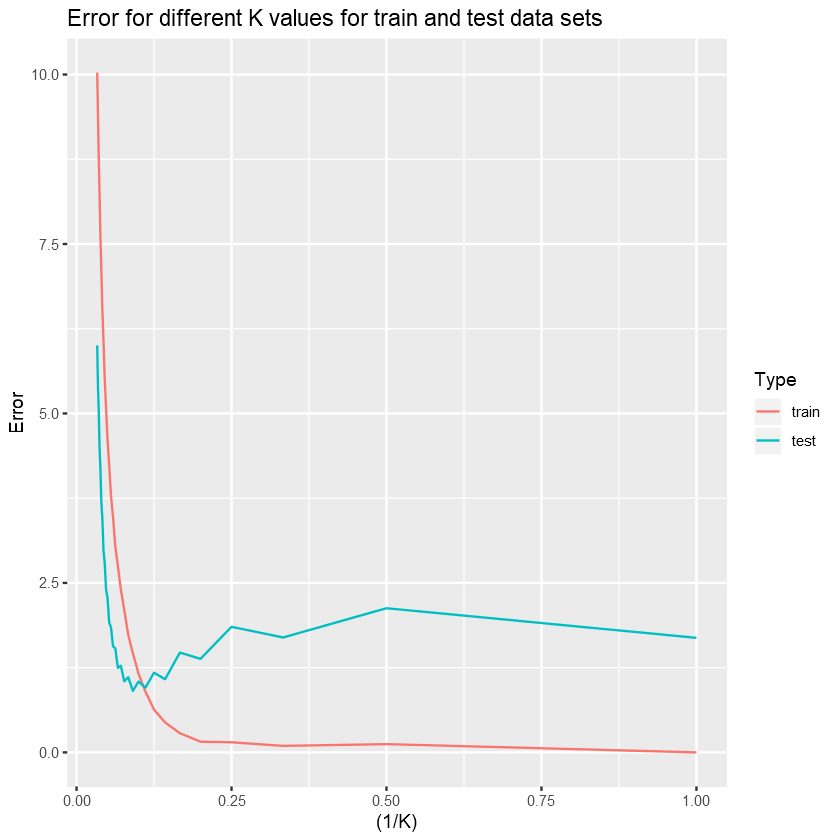

In [23]:
# plotting the train and test data error calculated for different K-Values(1 to 30).

error_file_viz <- melt(error_file, id='K') # reshaping for visualization

names(error_file_viz) <- c('K', 'Type', 'Error') #rename the columns being reshaped

#Plotting the error graph
ggplot(data=error_file_viz, aes(x=(1/K), y=Error, color=Type)) + geom_line() + ggtitle("Error for different K values for train and test data sets")

#### Question III. 

Report (in your Jupyter Notebook file) the optimum value for K in terms of the testing error. Discuss the values of K and model complexity corresponding to underfitting and overfitting based on your plot in the previous part (Part II).

##### Answers 
- Estimating the Optimum value for K based on testing error
 1. Optimum value for k lies at the value of ~0.1 of 1/K which corresponds to the **K-Value of 10**
 2. The model $underfits$ for the large values of K where both Training and testing Errors are Large
 3. The model $overfits$ for small values of K where the training error is very small but there is considerable testing error

##### References
- Logic : https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
- Undderstand the distance Calcuation :https://www.saedsayad.com/k_nearest_neighbors_reg.htm